<a href="https://colab.research.google.com/github/ahmedmoustafa/Notebooks/blob/main/misc/PCA_for_RNA_SEQ_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA for RNA-SEQ COVID
---


In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data = read.table ("https://media.githubusercontent.com/media/ahmedmoustafa/gene-expression-datasets/main/datasets/covid19/covid19.tsv", header = TRUE, row.names = 1)
head(data)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,⋯,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.49,0.29,0.26,0.45,0.17,0.21,0.49,0.12,0.51,0.10,⋯,0.37,0.33,0.25,0.20,0.40,0.30,0.70,0.75,2.80,0.22
A1CF,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A2M,0.21,0.14,0.03,0.09,0.00,0.08,0.23,0.08,0.88,0.13,⋯,0.07,0.06,0.11,0.01,0.04,0.02,0.02,0.27,0.04,0.28
A2ML1,0.04,0.00,0.02,0.07,0.05,0.04,0.03,0.01,0.02,0.01,⋯,0.01,0.00,0.00,0.02,0.02,0.02,0.01,0.00,0.00,0.00
A3GALT2,0.07,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.79,0.15,⋯,0.18,0.00,0.04,0.00,0.00,0.00,0.00,0.06,0.00,0.00
A4GALT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.03,0.07,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
dim(data)

[1] 19472   126

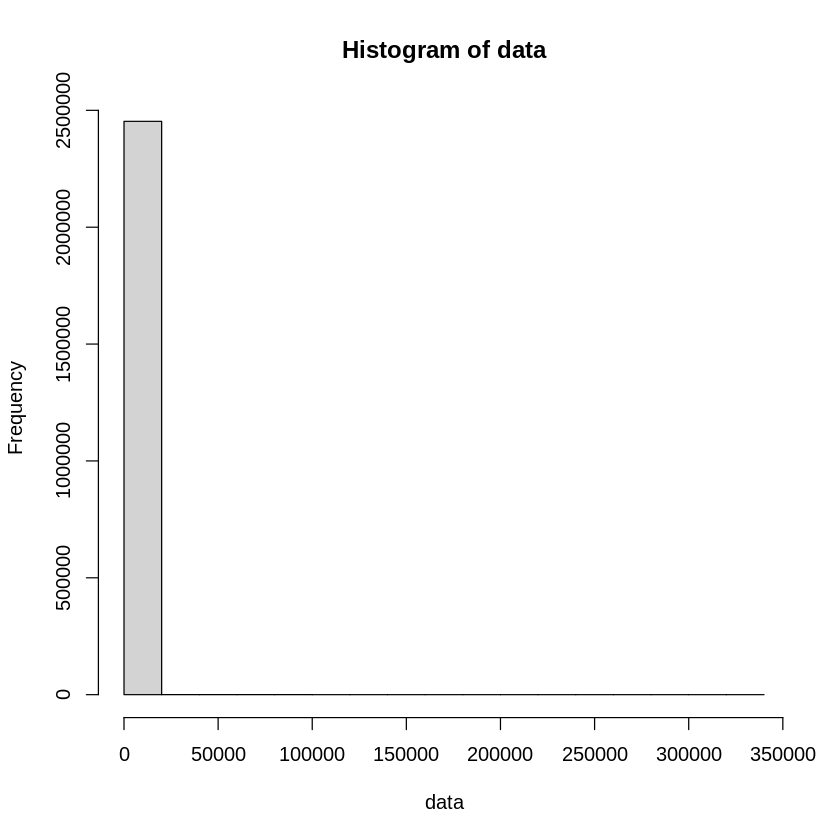

In [4]:
data = as.matrix(data)
hist(data)

In [5]:
meta = read_csv("https://raw.githubusercontent.com/ahmedmoustafa/gene-expression-datasets/main/datasets/covid19/covid19.meta.csv")
head(meta)

Rows: 126 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): accession, sample_id, sample, sex, severity, condition
dbl (1): age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


accession,sample_id,sample,age,sex,severity,condition
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
GSM4753021,COVID_01_39y_male_NonICU,C1,39,male,NonICU,COVID
GSM4753022,COVID_02_63y_male_NonICU,C2,63,male,NonICU,COVID
GSM4753023,COVID_03_33y_male_NonICU,C3,33,male,NonICU,COVID
GSM4753024,COVID_04_49y_male_NonICU,C4,49,male,NonICU,COVID
GSM4753025,COVID_05_49y_male_NonICU,C5,49,male,NonICU,COVID
GSM4753026,COVID_06_:y_male_NonICU,C6,NA,male,NonICU,COVID


In [6]:
pca = prcomp(t(data))
summary(pca)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7.026e+04 5.366e+04 1.664e+04 1.492e+04 1.237e+04
Proportion of Variance 5.643e-01 3.290e-01 3.165e-02 2.544e-02 1.750e-02
Cumulative Proportion  5.643e-01 8.933e-01 9.249e-01 9.504e-01 9.679e-01
                             PC6       PC7      PC8       PC9      PC10
Standard deviation     1.040e+04 5.446e+03 4.58e+03 4.293e+03 3.906e+03
Proportion of Variance 1.237e-02 3.390e-03 2.40e-03 2.110e-03 1.740e-03
Cumulative Proportion  9.802e-01 9.836e-01 9.86e-01 9.881e-01 9.899e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     3.488e+03 3.155e+03 3.009e+03 2.543e+03 2.323e+03
Proportion of Variance 1.390e-03 1.140e-03 1.040e-03 7.400e-04 6.200e-04
Cumulative Proportion  9.913e-01 9.924e-01 9.934e-01 9.942e-01 9.948e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     2.125e

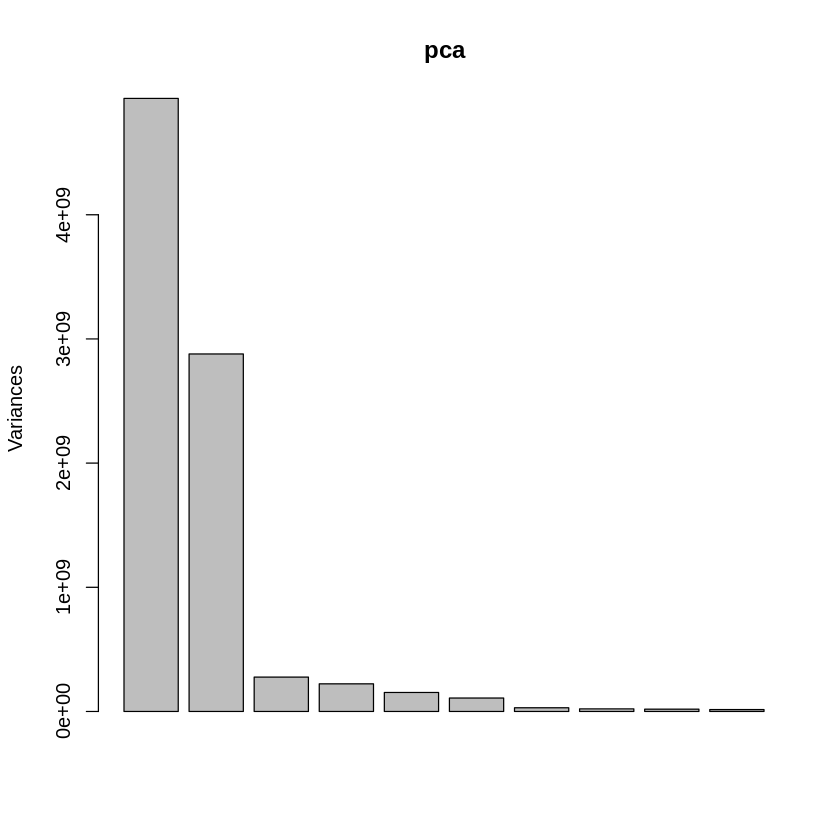

In [7]:
plot(pca)

In [8]:
pca2 = data.frame (sample = row.names(pca$x), pca$x[, 1:5])
head(pca2)

,sample,PC1,PC2,PC3,PC4,PC5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,C1,-39217.007,-49928.805,-6779.4571,-354.3343,4584.771
C2,C2,-34127.521,-42936.201,18526.2059,6423.4539,2490.930
C3,C3,-62908.084,-9761.419,-11473.6331,-23446.7568,17826.800
C4,C4,3387.928,-80875.718,-4289.2666,12890.0197,-6170.607
C5,C5,-67812.512,26973.370,-18533.3119,16223.3123,9680.759
C6,C6,67697.468,-32276.148,638.3527,9600.3644,3320.217


In [9]:
pca3 = pca2 %>% inner_join(meta)
head(pca3)

Joining, by = "sample"


,sample,PC1,PC2,PC3,PC4,PC5,accession,sample_id,age,sex,severity,condition
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,C1,-39217.007,-49928.805,-6779.4571,-354.3343,4584.771,GSM4753021,COVID_01_39y_male_NonICU,39,male,NonICU,COVID
2,C2,-34127.521,-42936.201,18526.2059,6423.4539,2490.930,GSM4753022,COVID_02_63y_male_NonICU,63,male,NonICU,COVID
3,C3,-62908.084,-9761.419,-11473.6331,-23446.7568,17826.800,GSM4753023,COVID_03_33y_male_NonICU,33,male,NonICU,COVID
4,C4,3387.928,-80875.718,-4289.2666,12890.0197,-6170.607,GSM4753024,COVID_04_49y_male_NonICU,49,male,NonICU,COVID
5,C5,-67812.512,26973.370,-18533.3119,16223.3123,9680.759,GSM4753025,COVID_05_49y_male_NonICU,49,male,NonICU,COVID
6,C6,67697.468,-32276.148,638.3527,9600.3644,3320.217,GSM4753026,COVID_06_:y_male_NonICU,NA,male,NonICU,COVID


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


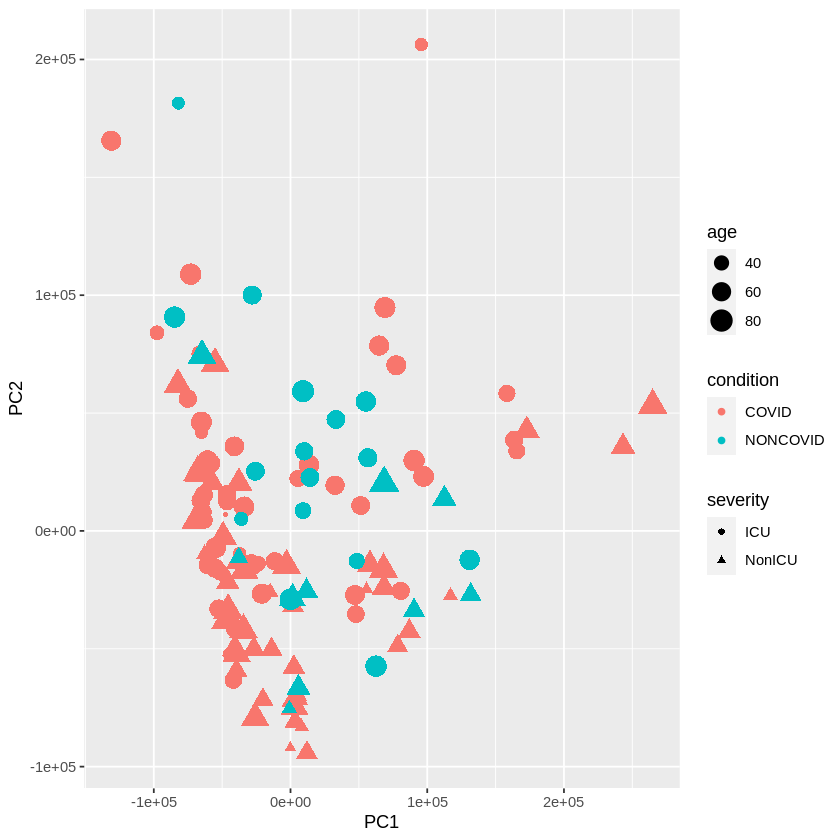

In [10]:
ggplot(pca3) +
  geom_point (aes(x = PC1, y = PC2, color = condition, shape = severity, size = age))

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


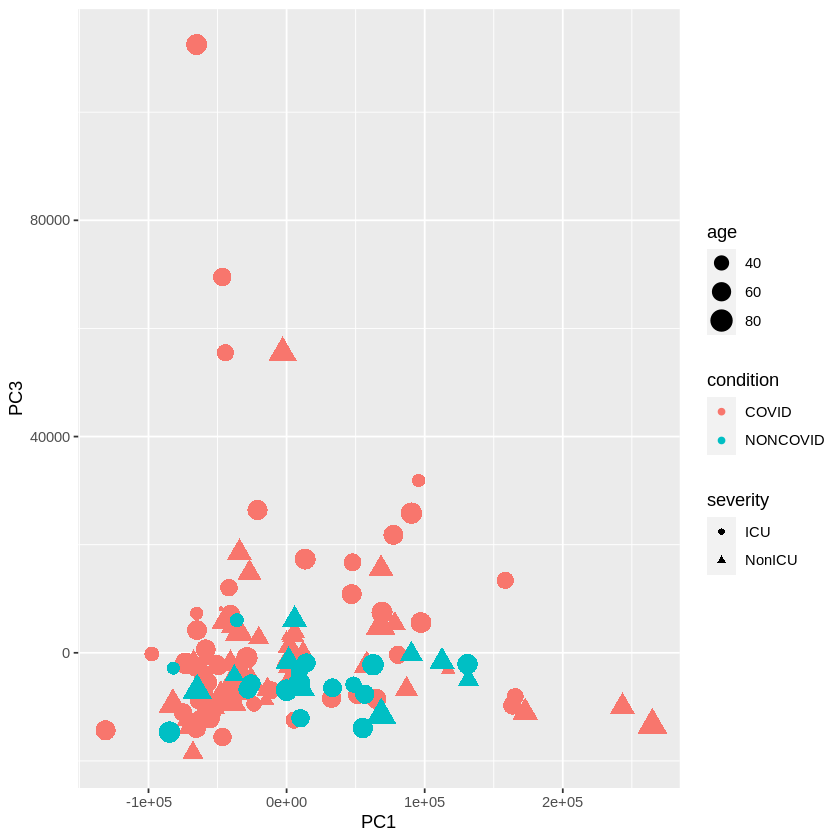

In [11]:
ggplot(pca3) +
  geom_point (aes(x = PC1, y = PC3, color = condition, shape = severity, size = age))

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


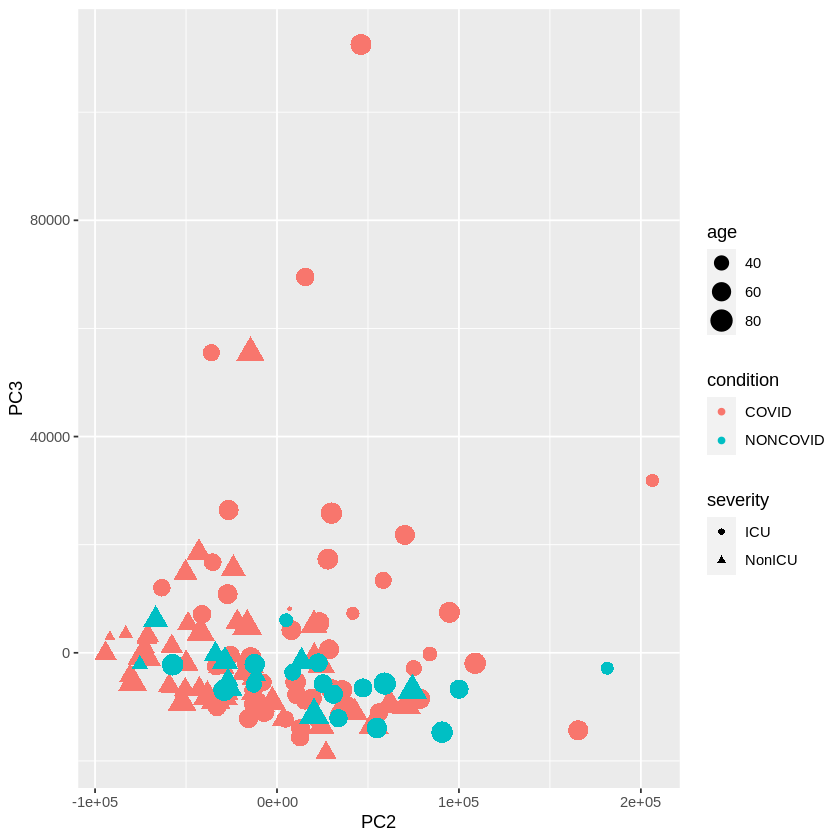

In [12]:
ggplot(pca3) +
  geom_point (aes(x = PC2, y = PC3, color = condition, shape = severity, size = age))